<a href="https://colab.research.google.com/github/TheAgaveFairy/MusicGeneration/blob/main/eegbrainwavefeelingemotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# just plotting the birdy654/eeg-brainwave-dataset-feeling-emotions dataset

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("birdy654/eeg-brainwave-dataset-feeling-emotions")
print("Path to dataset files:", path)

100%|██████████| 11.9M/11.9M [00:00<00:00, 52.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions/versions/1


In [5]:
def list_files(startpath, trunc=True):
    print(f"root path is:\n{path}\nbeginning walk:")
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        if trunc:
            files = files[:2]
        for f in files:
            print('{}{}'.format(subindent, f))
if True:
  list_files(path)

root path is:
/root/.cache/kagglehub/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions/versions/1
beginning walk:
1/
    emotions.csv


In [8]:
df = pd.read_csv(os.path.join(path, "emotions.csv"))
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


<ipython-input-28-f6bef7593a81>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_data = df.groupby('label').apply(lambda x: x.sample(1)) # , include_groups = False, , random_state=69


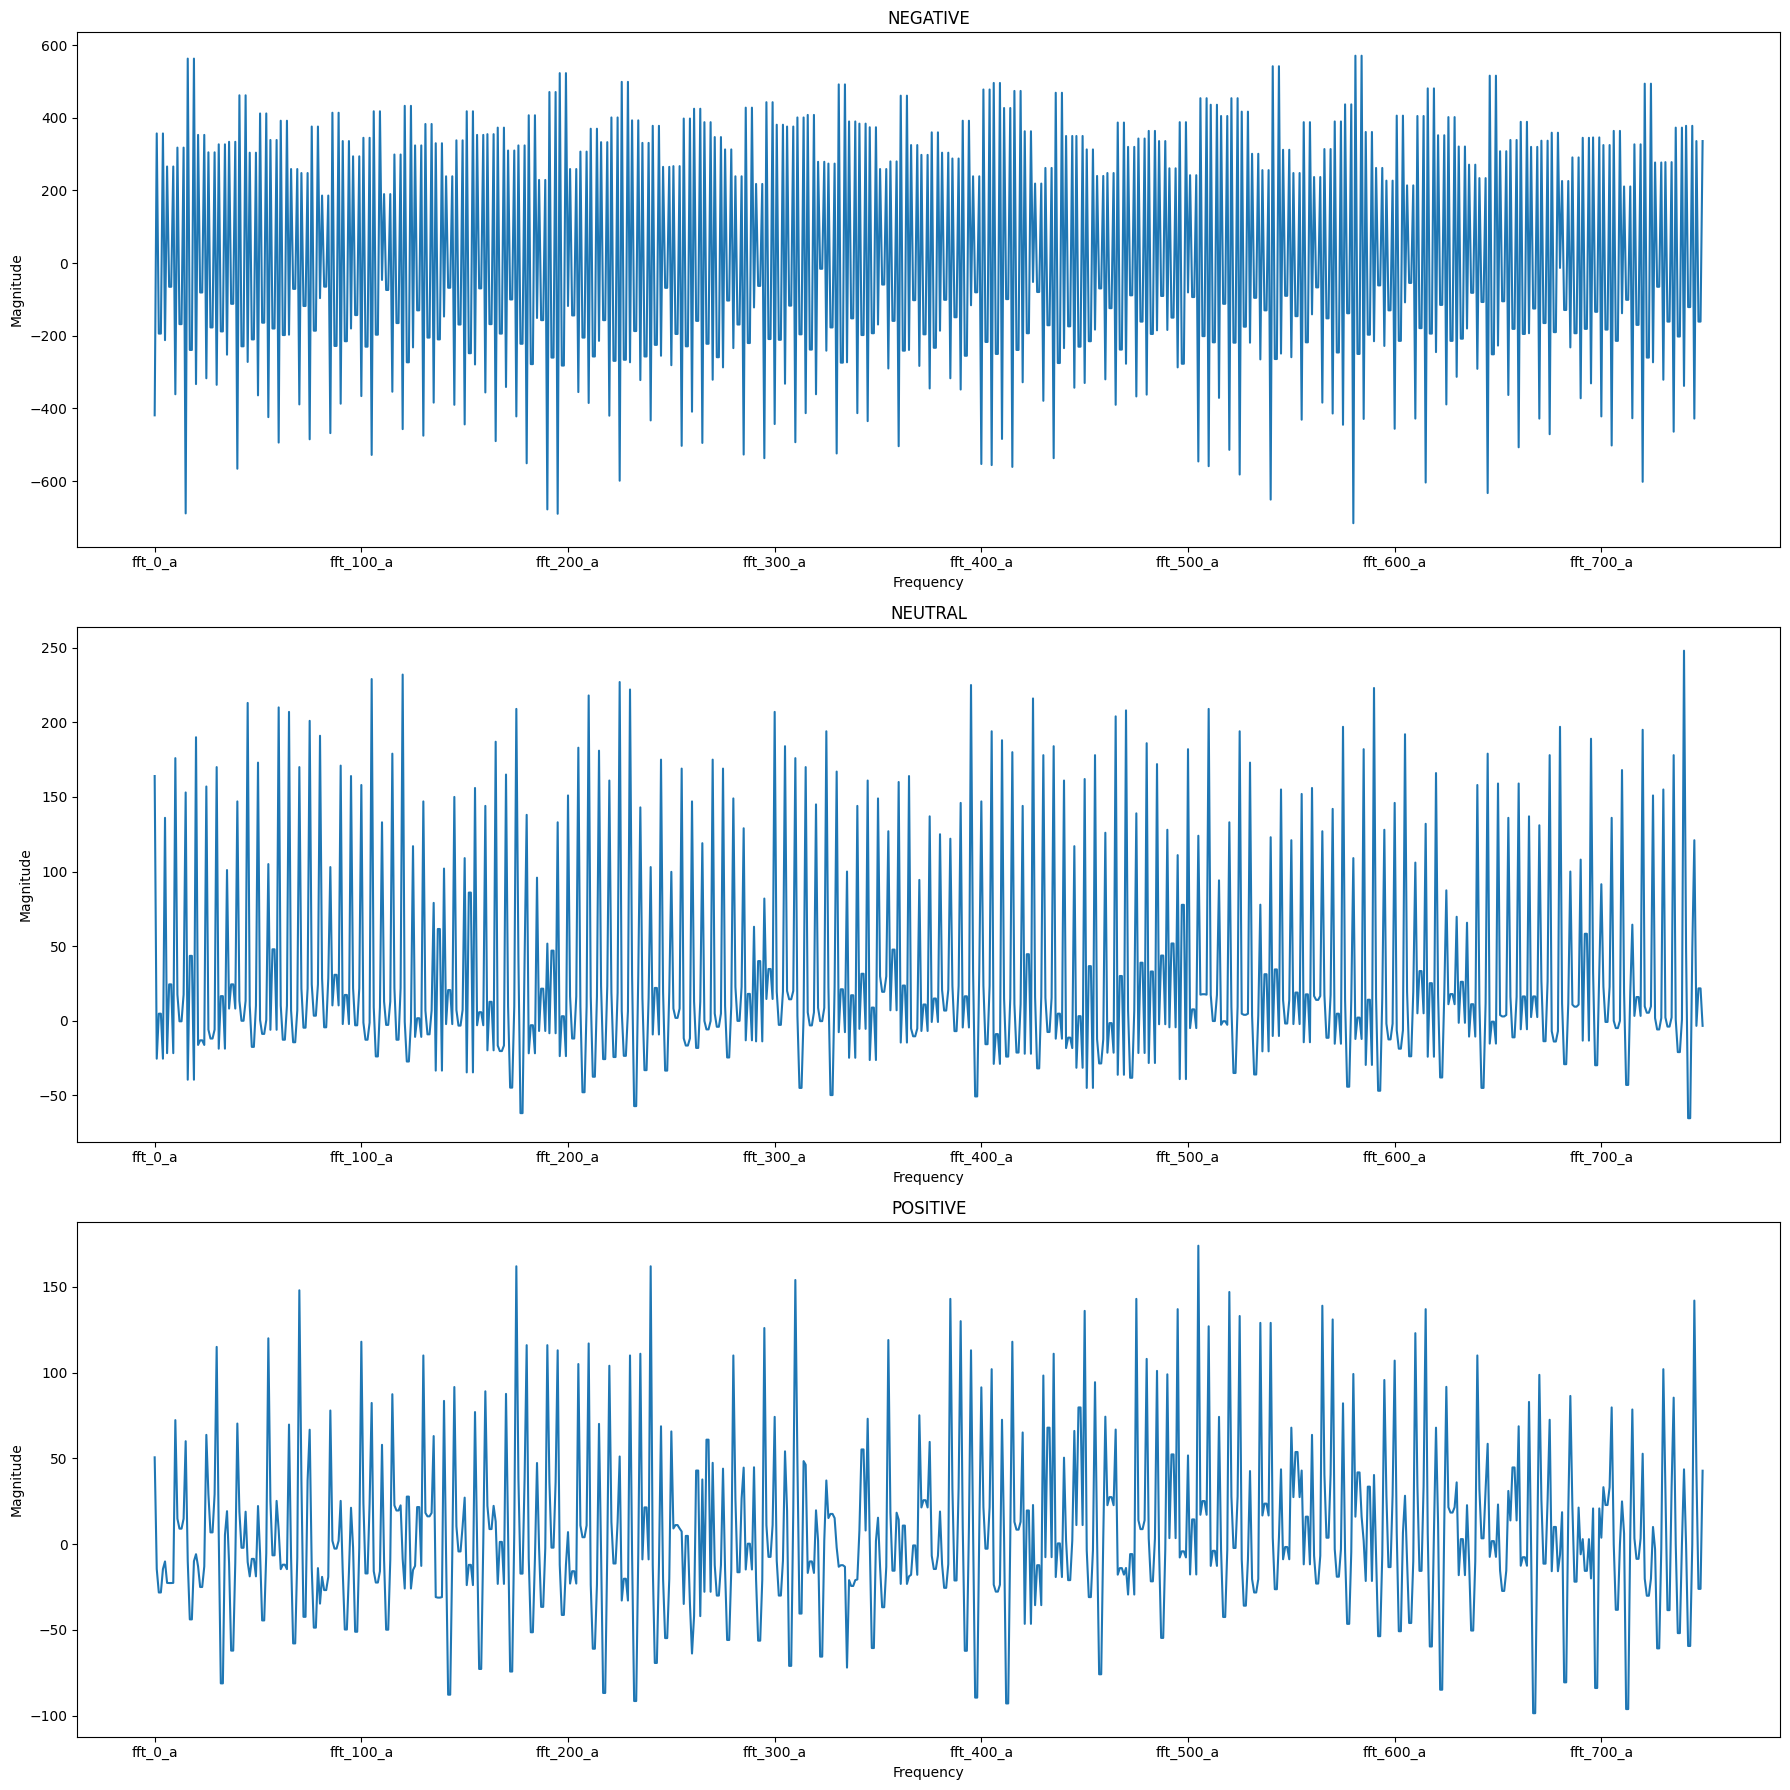

In [28]:
sample_data = df.groupby('label').apply(lambda x: x.sample(1)) # , include_groups = False, , random_state=69
fft_cols = [col for col in sample_data.columns if 'fft' in col and '_a' in col]

fig, axes = plt.subplots(len(sample_data), 1, figsize=(18, len(sample_data) * 6))
if len(sample_data) == 1:
  axes = [axes]

for ax, (infos, row) in zip(axes, sample_data.iterrows()):
  #print(infos)
  fft_values = row[fft_cols]
  ax.plot(fft_values)
  ax.set_title(f"{infos[0]}")
  ax.set_xlabel("Frequency")
  ax.set_ylabel("Magnitude")
  ax.set_xticks(list(range(0, len(fft_values), 100)))
  #ax.set_xticklabels(list(range(0, len(fft_values), 10)
plt.tight_layout()
plt.show()

